In [1]:
!pip install plotly-express

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import plotly_express as px

Grafo


[1, 2, 4]
[(1, 4), (2, 4)]


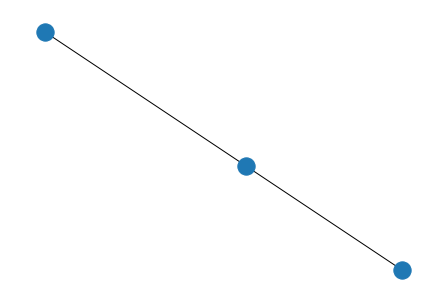

In [3]:
import networkx as nx

G = nx.Graph()

#add node
G.add_node(1)
G.add_node(2,color='red')
G.add_node(4, color="red")
#add edges
G.add_edge(1,4,weight=1)
G.add_edge(2,4,weight=2)

print(G.nodes)
print(G.edges)

nx.draw(G)


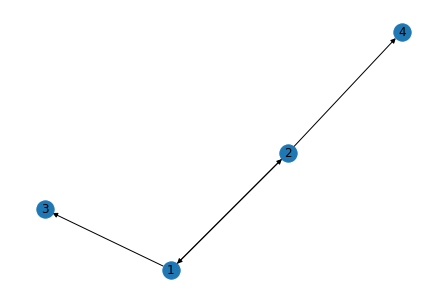

In [4]:
DG = nx.DiGraph()
DG.add_edge(2, 1)   # adds the nodes in order 2, 1
DG.add_edge(1, 3)
DG.add_edge(2, 4)
DG.add_edge(1, 2)

nx.draw(DG, with_labels=True)

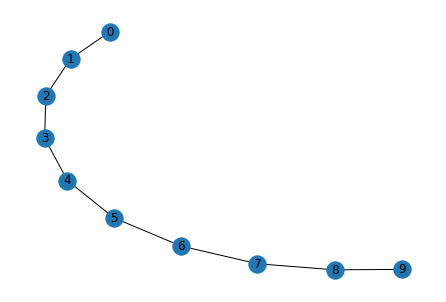

In [5]:
G = nx.path_graph(10)
#Com layout
#pos = nx.spring_layout(G)
pos = nx.spring_layout(G,seed=100)
nx.draw(G, pos, with_labels=True)

Shell layout

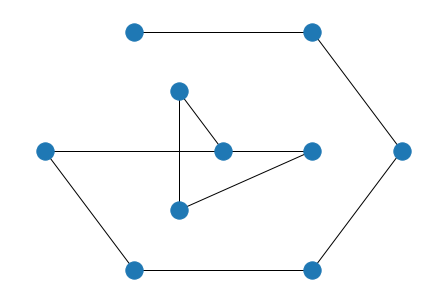

In [6]:
G = nx.path_graph(10)
#nx.draw(G)
shells = [[0], [1, 2, 3],[4,5,6,7,8,9]]
pos = nx.shell_layout(G, shells)
nx.draw(G,pos)

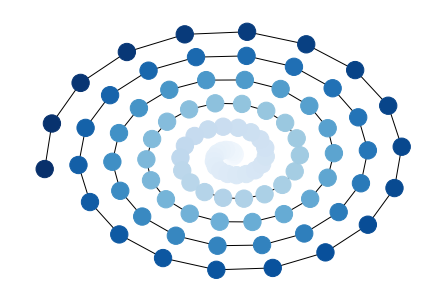

In [7]:
import matplotlib.pyplot as plt
G = nx.path_graph(100)
pos = nx.spiral_layout(G)
nx.draw(G, pos=pos, node_color=list(range(100)), cmap=plt.cm.Blues)

['Myriel', 'Napoleon', 'MlleBaptistine', 'MmeMagloire', 'CountessDeLo', 'Geborand', 'Champtercier', 'Cravatte', 'Count', 'OldMan', 'Labarre', 'Valjean', 'Marguerite', 'MmeDeR', 'Isabeau', 'Gervais', 'Tholomyes', 'Listolier', 'Fameuil', 'Blacheville', 'Favourite', 'Dahlia', 'Zephine', 'Fantine', 'MmeThenardier', 'Thenardier', 'Cosette', 'Javert', 'Fauchelevent', 'Bamatabois', 'Perpetue', 'Simplice', 'Scaufflaire', 'Woman1', 'Judge', 'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille', 'Pontmercy', 'Boulatruelle', 'Eponine', 'Anzelma', 'Woman2', 'MotherInnocent', 'Gribier', 'Jondrette', 'MmeBurgon', 'Gavroche', 'Gillenormand', 'Magnon', 'MlleGillenormand', 'MmePontmercy', 'MlleVaubois', 'LtGillenormand', 'Marius', 'BaronessT', 'Mabeuf', 'Enjolras', 'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel', 'Bossuet', 'Joly', 'Grantaire', 'MotherPlutarch', 'Gueulemer', 'Babet', 'Claquesous', 'Montparnasse', 'Toussaint', 'Child1', 'Child2', 'Brujon', 'MmeHucheloup']
[('Myriel', 'Napo

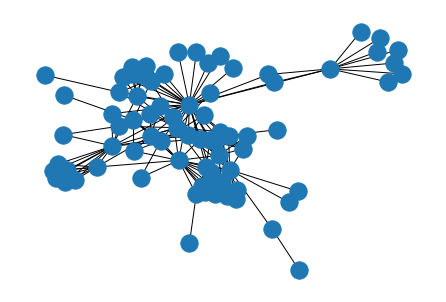

In [9]:
G = nx.read_gml('lesmiserables.gml')
print(G.nodes)
print(G.edges)
print(G.nodes['Myriel'])
print(G.edges[('Myriel', 'Napoleon')])
pos = nx.spring_layout(G,seed=200)
nx.draw(G,pos)

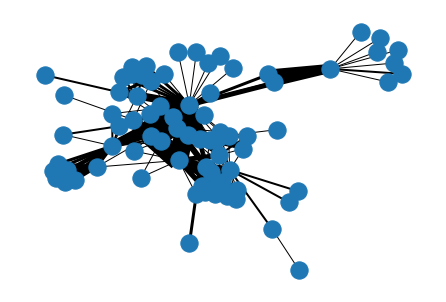

In [10]:
G = nx.read_gml('lesmiserables.gml')
weights = [G.edges[t]['value']  for t in G.edges]
pos = nx.spring_layout(G,seed=200)
nx.draw(G,pos,width=weights)

In [23]:
import random
myNodes = list(G.nodes())
random.shuffle(myNodes)
A = nx.adjacency_matrix(G,nodelist=myNodes)#,weight='value')
print(G.nodes)
AA = A.todense()
#print(AA)
fig = px.imshow(AA,color_continuous_scale='purples')
fig.show()

['Myriel', 'Napoleon', 'MlleBaptistine', 'MmeMagloire', 'CountessDeLo', 'Geborand', 'Champtercier', 'Cravatte', 'Count', 'OldMan', 'Labarre', 'Valjean', 'Marguerite', 'MmeDeR', 'Isabeau', 'Gervais', 'Tholomyes', 'Listolier', 'Fameuil', 'Blacheville', 'Favourite', 'Dahlia', 'Zephine', 'Fantine', 'MmeThenardier', 'Thenardier', 'Cosette', 'Javert', 'Fauchelevent', 'Bamatabois', 'Perpetue', 'Simplice', 'Scaufflaire', 'Woman1', 'Judge', 'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille', 'Pontmercy', 'Boulatruelle', 'Eponine', 'Anzelma', 'Woman2', 'MotherInnocent', 'Gribier', 'Jondrette', 'MmeBurgon', 'Gavroche', 'Gillenormand', 'Magnon', 'MlleGillenormand', 'MmePontmercy', 'MlleVaubois', 'LtGillenormand', 'Marius', 'BaronessT', 'Mabeuf', 'Enjolras', 'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel', 'Bossuet', 'Joly', 'Grantaire', 'MotherPlutarch', 'Gueulemer', 'Babet', 'Claquesous', 'Montparnasse', 'Toussaint', 'Child1', 'Child2', 'Brujon', 'MmeHucheloup']


optimal leaf ordering

In [25]:
from scipy.cluster import hierarchy
Z = hierarchy.ward(AA)
newOrder = hierarchy.leaves_list(hierarchy.optimal_leaf_ordering(Z, AA))
reorderedNodes = [myNodes[t] for t in newOrder]
reorderedAA = nx.adjacency_matrix(G,nodelist=reorderedNodes).todense()
px.imshow(reorderedAA,color_continuous_scale='purples')

<ipython-input-25-585dc18f0868>:3: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



Spectral

In [14]:
nodeOrder = nx.spectral_ordering(G)
spectralAA = nx.adjacency_matrix(G,nodelist=nodeOrder).todense()
px.imshow(spectralAA,color_continuous_scale='purples')

Sintetico

In [ ]:
import random
X = []
N = 20
for i in range(N):
  if i < N//2:
    line = [random.gauss(20,3) for t in range(N//2)]
    line += [random.gauss(5,3) for t in range(N//2)]
    X.append(line)
  else:
    line = [random.gauss(5,3) for t in range(N//2)]
    line += [random.gauss(20,3) for t in range(N//2,N)]
    X.append(line)
order = list(range(N))
random.shuffle(order)
print(order)
A1 = [[X[i][j] for j in order] for i in order]
px.imshow(A1,color_continuous_scale='purples')

[4, 14, 7, 0, 9, 13, 1, 10, 5, 19, 8, 12, 6, 16, 11, 17, 2, 15, 18, 3]


In [ ]:
Z = hierarchy.ward(A1)
newOrder = hierarchy.leaves_list(hierarchy.optimal_leaf_ordering(Z, X))
A2 = [[X[i][j] for j in newOrder] for i in newOrder]
fig = px.imshow(A2,color_continuous_scale='purples')
fig.show()

Treemap

In [ ]:
import plotly.express as px

#
fig = px.treemap(
    names = ["Eve","Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parents = ["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve"],
    values=[10, 14, 12, 10, 2, 6, 6, 4, 4]
)

#
fig.show()


In [ ]:
import numpy as np
df = px.data.gapminder().query("year == 2007")
fig = px.treemap(df, path=[px.Constant("world"), 'continent', 'country'], values='pop',
                  color='lifeExp', hover_data=['iso_alpha'],
                  color_continuous_scale='Reds',#'RdBu',
                  color_continuous_midpoint=np.average(df['lifeExp'], weights=df['pop']))
#fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

Icicle

In [ ]:
data = dict(
    character=["Eve", "Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parent=["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve" ],
    value=[10, 14, 12, 10, 2, 6, 6, 4, 4])

fig =px.icicle(
    data,
    names='character',
    parents='parent',
    values='value',
)
fig.update_traces(root_color="lightgrey")
fig.show()

In [ ]:
df = px.data.gapminder().query("year == 2007")
fig = px.icicle(df, path=[px.Constant("world"), 'continent', 'country'], values='pop',
                  color='lifeExp', hover_data=['iso_alpha'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['lifeExp'], weights=df['pop']))
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

Sunburst

In [ ]:
data = dict(
    character=["Eve", "Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parent=["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve" ],
    value=[10, 14, 12, 10, 2, 6, 6, 4, 4])

fig = px.sunburst(
    data,
    names='character',
    parents='parent',
    values='value',
)
fig.show()

In [ ]:
df = px.data.gapminder().query("year == 2007")
fig = px.sunburst(df, path=['continent', 'country'], values='pop',
                  color='lifeExp', hover_data=['iso_alpha'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['lifeExp'], weights=df['pop']))
fig.show()

<ipython-input-220-dd5982b04b7f>:7: DeprecationWarning:

nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723



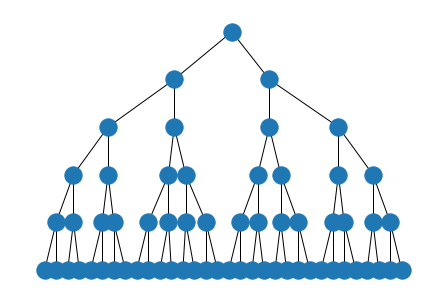

In [ ]:
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import matplotlib.pyplot as plt

T = nx.balanced_tree(2, 5)

pos = graphviz_layout(T, prog="dot")
nx.draw(T, pos)
plt.show()

<ipython-input-218-6b72539b42d6>:3: DeprecationWarning:

nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723



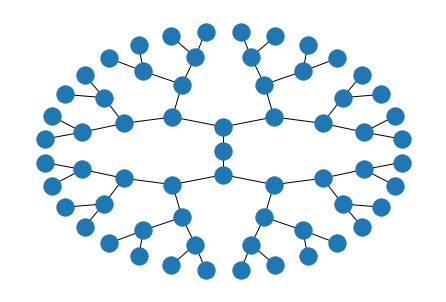

In [ ]:
T = nx.balanced_tree(2, 5)

pos = graphviz_layout(T, prog="twopi")
nx.draw(T, pos)
plt.show()